# Vasicek Interest Rate Model

A simple model for the stochastic simulation of interest rates. Shifts in rates are now correlated by using one model.
Rates should idealy be correlated using Cholesky decomposition. the Vasicek model is a simplified model that may not capture all the features of real-world interest rate dynamics.

https://www.investopedia.com/terms/v/vasicek-model.asp#:~:text=The%20term%20Vasicek%20Interest%20Rate,will%20move%20in%20the%20future.

In [15]:
from src.data.zerocurve import Zerocurve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from src.models import predict
from pandas.tseries.offsets import BDay

In [26]:
zerocurve = Zerocurve()
zerocurve.load_data()
df_z = zerocurve.df
yield_data = df_z.pivot(columns = 'tenor', values = 'rate')
pos_date = yield_data.index[-1]

2023-03-20 21:59:56.266 | INFO     | src.data.dataset:load_data:45 - loading zerocurve data from file.
c:\Users\M\miniconda3\envs\rlalm\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


In [27]:
pos_date

Timestamp('2023-02-28 00:00:00')

In [28]:
rate_changes = np.log(1 + yield_data.pct_change()).dropna()
mu = rate_changes.mean().values
sigma = rate_changes.std().values
T = 10 # time horizon
dt = 1 / 252  # 1 business day

for i in range(int(T/dt)):
    r0 = yield_data.iloc[-1].values
    next_day = yield_data.index[-1] + BDay(1)
    r1 = np.exp(predict.vasicek(np.log(r0), mu, sigma, dt)) # Exponentiate the predicted log return
    yield_data.loc[next_day] = r1
    

c:\Users\M\miniconda3\envs\rlalm\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [29]:
pd.melt(yield_data.reset_index(), id_vars = 'rate_dt')

,rate_dt,tenor,value
0,2004-09-06,0,2.121240
1,2004-09-07,0,2.139612
2,2004-09-08,0,2.149441
3,2004-09-09,0,2.129304
4,2004-09-10,0,2.110625
...,...,...,...
108715,2032-10-20,360,3.187274
108716,2032-10-21,360,3.167077
108717,2032-10-22,360,3.195272
108718,2032-10-25,360,3.176582


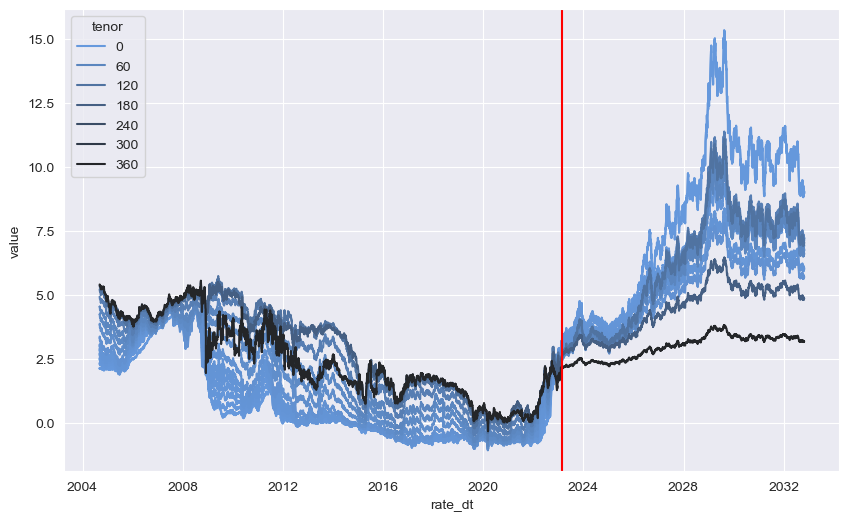

In [30]:
ax = sns.lineplot(pd.melt(yield_data.reset_index(), id_vars = 'rate_dt'), x = 'rate_dt', y = 'value', hue = 'tenor', palette = sns.dark_palette("#69d", reverse=True, as_cmap=True))
ax.axvline(pos_date, 5.5,0, color = 'r')